# Data Cleaning
*How to clean your data to make it ready for analysis and machine learning*

Credit: [The Ultimate Guide to Data Cleaning](https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
data = pd.read_csv("data_for_cleaning.csv")

**The Dataset**
- Date
- GameID
- drive
- qtr
- down
- time
- TimeUnder - Minutes remaining in half
- TimeSecs - Seconds left in game at the time of the play
- PlayTimeDiff - The time difference between plays in seconds
- SideofField

In [ ]:
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField
0,10 September 2009,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN
1,10 September 2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT
2,10 September 2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT
3,10 September 2009,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT
4,10 September 2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT


## Data cleaning is a 3-step process

### Step 1: Find the dirt

Start data cleaning by determining what is wrong with your data.

Look for the following:

- Are there rows with empty values? Entire columns with no data?  Which data is missing and why?
- How is data distributed? Remember, visualizations are your friends. Plot outliers. Check distributions to see which groups or ranges are more heavily represented in your dataset.
- Keep an eye out for the weird: are there impossible values? Like “date of birth: male”, “address: -1234”. 
- Is your data consistent? Why are the same product names written in uppercase and other times in camelCase?

**ตรวจสอบข้อมูลเบื้องต้นด้วย describe()**

In [ ]:
data.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000


**ตรวจสอบข้อมูลทั้งหมดว่ามี null value ในแต่ละ column จำนวนเท่าไหร่**

In [ ]:
null_value = data.isnull().sum()
null_value

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

**แสดง columns ทั้งหมดที่มี null values เก็บไว้ในตัวแปล**

In [ ]:
null_column = list(null_value[null_value > 0].index)
null_column

['down', 'time', 'TimeSecs', 'PlayTimeDiff', 'SideofField']

### Step 2: Scrub the dirt

*Knowing the problem is half the battle. The other half is solving it.*

Depending on the type of data dirt you’re facing, you’ll need different cleaning techniques.

**ตรวจสอบ Data type ในแต่ละ columns ที่มี null values**

In [ ]:
print(data["down"].dtype)
print(data["time"].dtype)
print(data["TimeSecs"].dtype)
print(data["PlayTimeDiff"].dtype)
print(data["SideofField"].dtype)

float64
object
float64
float64
object


#### 2.1. **Missing data**

Start by spotting all the different disguises missing data wears. It appears in values such as 0, “0”, empty strings, “Not Applicable”, “NA”, “#NA”, None, NaN, NULL or Inf. 

Programmers before you might have put default values instead of missing data (“email@company.com”). 

When you have a general idea of what your missing data looks like, it is time to answer the crucial question:

*“Is missing data telling me something valuable?”*

There are 3 main approaches to cleaning missing data:
- **Drop rows and/or columns with missing data.** 
- **Recode missing data into a different format.** 
 - Numerical computations can break down with missing data. Recoding missing values into a different column saves the day. For example, the column “payment_date” with empty rows can be recoded into a column “payed_yet” with 0 for “no” and 1 for “yes”. ‍
- **Fill in missing values with “best guesses.”**

**แสดงจำนวนข้อมูลดั้งเดิม เพื่อเปรียบเทียบ**

In [ ]:
#original data size
data.shape[0]

362447

**ลบ "ข้อมูล" ที่เป็น null value ออกทั้งหมด (ไม่ save ทับข้อมูลเดิม)**

In [ ]:
data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField
1,10 September 2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT
2,10 September 2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT
3,10 September 2009,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT
4,10 September 2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT
5,10 September 2009,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN
...,...,...,...,...,...,...,...,...,...,...
362437,01 January 2017,2017010102,19,4,2.0,01:16,2,76.0,0.0,GB
362439,01 January 2017,2017010102,19,4,3.0,01:14,2,74.0,0.0,GB
362441,01 January 2017,2017010102,19,4,4.0,00:28,1,28.0,0.0,GB
362442,01 January 2017,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB


**ลบ "column" ที่มี null value ออกทั้งหมด (ไม่ save ทับข้อมูลเดิม)**

In [ ]:
data.drop(null_column, axis=1)

,Date,GameID,Drive,qtr,TimeUnder
0,10 September 2009,2009091000,1,1,15
1,10 September 2009,2009091000,1,1,15
2,10 September 2009,2009091000,1,1,15
3,10 September 2009,2009091000,1,1,14
4,10 September 2009,2009091000,1,1,14
...,...,...,...,...,...
362442,01 January 2017,2017010102,20,4,1
362443,01 January 2017,2017010102,20,4,1
362444,01 January 2017,2017010102,21,4,1
362445,01 January 2017,2017010102,21,4,1


**เปลี่ยนข้อมูลเลข 1 ใน column "down" จาก NaN ให้เป็น "one" (ไม่ save ทับข้อมูลเดิม)**

In [ ]:
data["down"].replace(np.NaN, "one")

0         one
1           1
2           2
3           3
4           4
         ... 
362442      1
362443    one
362444    one
362445      1
362446    one
Name: down, Length: 362447, dtype: object

**ตรวจสอบดูข้อมูลใน time และ timeSecs สำหรับทุกแถวที่ PlaytimeDiff เป็น null value**

In [ ]:
data[data["PlayTimeDiff"].isnull()].loc[:,["time","TimeSecs", "PlayTimeDiff"]]

,time,TimeSecs,PlayTimeDiff
2717,NaN,NaN,NaN
2718,03:48,228.0,NaN
2719,NaN,NaN,NaN
2720,03:39,219.0,NaN
4564,NaN,NaN,NaN
...,...,...,...
356993,00:00,1800.0,NaN
357030,NaN,NaN,NaN
357031,00:00,900.0,NaN
357083,NaN,NaN,NaN


**เลือก Column "PlayTimeDiff" จากนั้นแทนค่า null value ด้วยค่า mean ของ column นั้น (ไม่ save ทับข้อมูลเดิม)**

In [ ]:
data["PlayTimeDiff"].fillna(data["PlayTimeDiff"].mean())

0          0.0
1          7.0
2         37.0
3         41.0
4          8.0
          ... 
362442     6.0
362443     9.0
362444     0.0
362445     1.0
362446    12.0
Name: PlayTimeDiff, Length: 362447, dtype: float64

#### 2.2. **Outliers**

There are three approaches to dealing with outliers:

- **Remove outliers from the analysis.** 
 - Remove them by removing the upper and lower X-percentile of your data.
- **Segment data so outliers are in a separate group.** 
 - Put all the “normal-looking” data in one group, and outliers in another. 
- **Keep outliers, but use different statistical methods for analysis.** 
 - Weighted means (which put more weight on the “normal” part of the distribution) and trimmed means are two common approaches of analyzing datasets with outliers, without suffering the negative consequences of outliers.

##### **Handling Outliers with Boxplot**

**ลบ Outliers โดยการคำนวน Quartile 1 , Quartile 3 และ InterQuartile**

![iqr](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

In [ ]:
cal_Q1 = data["PlayTimeDiff"].quantile(0.25)
cal_Q3 = data["PlayTimeDiff"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

32.0

**คำนวน lower limit และ upper limite จาก Q1 Q3 และ IQR**

In [ ]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print(lower_limit)
print(upper_limit)

-43.0
85.0


**ตัด Outlier ของ column "PlayTimeDiff" ออกด้วยโดยใช้ lower_limit และ upper_limit** <br>
ปล. ใช้เทคนิค Row selection แบบ condition

In [ ]:
data.shape

(362447, 10)

In [ ]:
data = data[(data["PlayTimeDiff"] > lower_limit)&(data["PlayTimeDiff"] < upper_limit)]
data.shape

(361937, 10)

#### 2.3. **Contaminated data**

Contaminated data is another red flag for your collection process. Examples of contaminated data include:

- Wind turbine data in your water plant dataset.
- Purchase information in your customer address dataset.
- Future data in your current event time-series data. 

***With corrupted data, there is not much you can do except for removing it. This requires a lot of domain expertise.***

#### 2.4. **Inconsistent data**

“Wait, did we sell ‘Apples’, ‘apples’, or ‘APPLES’ this month? And what is this ‘monitor stand’ for $999 under the same product ID?”

***The best way to spot inconsistent representations of the same elements in your database is to visualize them.*** 

Plot bar charts per product category. Do a count of rows by category if this is easier.

#### 2.5. **Invalid data**

Similarly to corrupted data, invalid data is illogical. For example, users who spend -2 hours on our app, or a person whose age is 170. Unlike corrupted data, invalid data does not result from faulty collection processes, but from issues with data processing (usually during feature preparation or data cleaning).

‍**Cleaning invalid data mostly means amending the functions and transformations which caused the data to be invalid.** 

If this is not possible, we remove the invalid data.

**นับจำนวน rows ที่มีค่า TimeSecs ติดลบ**

In [ ]:
len(data[data['TimeSecs'] < 0])

2411

#### 2.6. **Duplicate data**
Duplicate data means the same values repeating for an observation point. This is damaging to our analysis because it can either deflate/inflate our numbers (e.g. we count more customers than there actually are, or the average changes because some values are more often represented).

**Cleaning duplicate data means findings the duplicate records and delete all but one.**

In [ ]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [ ]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


#### 2.7. **Data type issues**

Depending on which data type you work with (DateTime objects, strings, integers, decimals or floats), you can encounter problems specific to data types.

**Cleaning string**

Strings are usually the messiest part of data cleaning because they are often human-generated and hence prone to errors.

The common cleaning techniques for strings involve:

- Standardizing casing across the strings
- Removing whitespace and newlines
- Removing stop words (for some linguistic analyses)
- **Hot-encoding** categorical variables represented as strings
- Correcting typos
- Standardizing encodings - everyone has seen strings of the type �����.

**Cleaning date and time**

The cleaning process involves:
- Making sure that all your dates and times are either a DateTime object or a Unix timestamp. Use `df.info()` to check for data type.
- Internationalization and time zones. DateTime objects are often recorded with the time zone or without one.

##### **Hot-hot Encoding**

![onehot](https://ashish1500616.github.io/images/cdohe/mlcdohe5.png)

**เปลี่ยนข้อมูลใน column "down" ให้เป็นในรูปแบบ one hot**

In [ ]:
data["down"] = data["down"].astype("str")

In [ ]:
onehot_column = pd.get_dummies(data["down"], prefix="down")
onehot_column

,down_1.0,down_2.0,down_3.0,down_4.0,down_nan
0,0,0,0,0,1
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
362442,1,0,0,0,0
362443,0,0,0,0,1
362444,0,0,0,0,1
362445,1,0,0,0,0


**ทำการ Join ผลลัพธ์จากการ one hot กับ ช้อมูล original (ไม่ save ทับข้อมูลเดิม)**

In [ ]:
pd.concat([data, onehot_column], axis=1)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,down_1.0,down_2.0,down_3.0,down_4.0,down_nan
0,10 September 2009,2009091000,1,1,nan,15:00,15,3600.0,0.0,TEN,0,0,0,0,1
1,10 September 2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,1,0,0,0,0
2,10 September 2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,0,1,0,0,0
3,10 September 2009,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,0,0,1,0,0
4,10 September 2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,01 January 2017,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,1,0,0,0,0
362443,01 January 2017,2017010102,20,4,nan,00:13,1,13.0,9.0,GB,0,0,0,0,1
362444,01 January 2017,2017010102,21,4,nan,00:13,1,13.0,0.0,DET,0,0,0,0,1
362445,01 January 2017,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,1,0,0,0,0


#### 2.8. **Standardize and normalize data**

Standardization and normalization are used to rescale your numeric data to a common range (usually between 0 and 1 for normalization). 

Credit: [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

**What is Normalization?**
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Norm_eq.gif">

**What is Standardization?**
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif">


**Normalize or Standardize?**
Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- **Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
- **Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. 


***You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.***


**Also, the scaling of target values is generally not required.**

##### Normalization & Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**ทดลอง plot histogram ของ column "PlayTimeDiff" เพื่อดู distribution ของข้อมูล** <br>

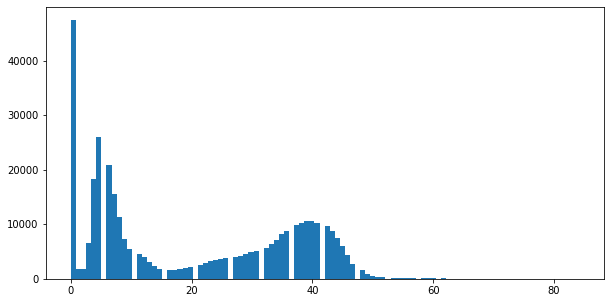

In [ ]:
# Remove outlier
data = data[(data["PlayTimeDiff"] > lower_limit)&(data["PlayTimeDiff"] < upper_limit)]

plt.figure(figsize=(10,5))
plt.hist(data["PlayTimeDiff"], bins=100)
plt.show()

**ทำการ Normalize ข้อมูลจาก column "PlayTimeDiff" แล้วเก็บในตัวแปลใหม่**

In [ ]:
print('Min: ', data["PlayTimeDiff"].min())
print('Max: ', data["PlayTimeDiff"].max())
for_transform = data["PlayTimeDiff"].to_numpy().reshape(-1, 1)
for_transform

Min:  0.0
Max:  84.0


array([[ 0.],
       [ 7.],
       [37.],
       ...,
       [ 0.],
       [ 1.],
       [12.]])

In [ ]:
# fit scaler on training data
norm = MinMaxScaler().fit(for_transform)

# transform training data
playtime_norm = norm.transform(for_transform)
playtime_norm

array([[0.        ],
       [0.08333333],
       [0.44047619],
       ...,
       [0.        ],
       [0.01190476],
       [0.14285714]])

**นำข้อมูลที่ได้ Normalize มาทำการ plot histogram อีกครั้ง**

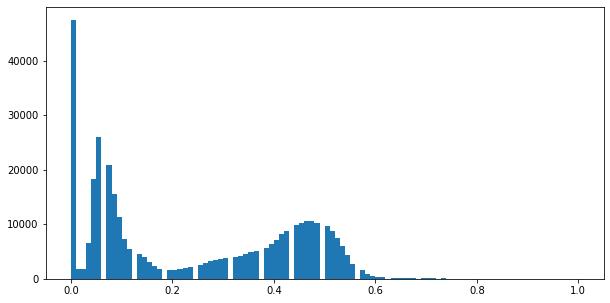

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(playtime_norm, bins=100)
plt.show()

**เห็นความแตกต่างหรือไม่ ?**

### การทำ Standardize

In [ ]:
scaler = StandardScaler().fit(for_transform)

playtime_std = scaler.transform(for_transform)
playtime_std

array([[-1.23128423],
       [-0.810589  ],
       [ 0.99239053],
       ...,
       [-1.23128423],
       [-1.17118491],
       [-0.51009241]])

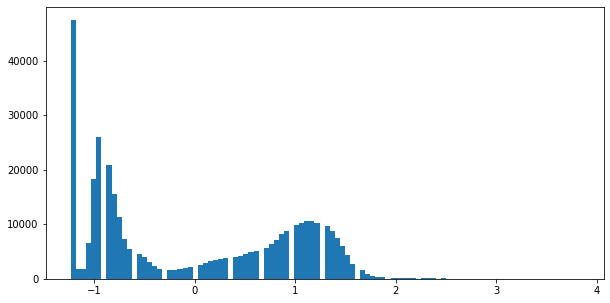

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(playtime_std, bins=100)
plt.show()

### การจัดการกับข้อมูล Date Time

In [ ]:
from datetime import datetime

**แปลงข้อมูล Date จาก String ให้อยู่ในรูปแบบ Datetime**

In [ ]:
def name_to_date(date):
    return datetime.strptime(date, '%d %B %Y').strftime('%Y-%m-%d')

In [ ]:
convert_date = list(map(name_to_date, data["Date"]))

In [ ]:
data.loc[:, "Date"] = pd.to_datetime(convert_date)

**ดึงข้อมูล วัน เดือน ปี ออกจาก column "Date"**

In [ ]:
data["Date"].dt.day

0         10
1         10
2         10
3         10
4         10
          ..
362442     1
362443     1
362444     1
362445     1
362446     1
Name: Date, Length: 361937, dtype: int64

In [ ]:
data["Date"].dt.month

0         9
1         9
2         9
3         9
4         9
         ..
362442    1
362443    1
362444    1
362445    1
362446    1
Name: Date, Length: 361937, dtype: int64

In [ ]:
data["Date"].dt.year

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
362442    2017
362443    2017
362444    2017
362445    2017
362446    2017
Name: Date, Length: 361937, dtype: int64

### Step 3: Rinse and repeat

Once cleaned, you repeat steps 1 and 2. This is helpful for three reasons:

1. You might have missed something.
2. Through cleaning, you discover new issues. For example, once you removed outliers from your dataset, you noticed that data is not bell-shaped anymore and needs reshaping before you can analyze it.
3. You learn more about your data.